__![Hotel Reservation](https://qloapps.com/wp-content/uploads/2020/07/reservation-5421878_1920-1024x683.jpg)__

## __Predicting Hotel Booking and Cancellation Demand__

__Problem Statement__

The dataset comprises information about hotel bookings, including details such as booking dates, room types, customer demographics, and booking status. The objective is to conduct a comprehensive analysis to derive actionable insights for hotel management.

__Goals__

The goal is to optimize hotel operations using data-driven insights. We aim to boost revenue, improve customer satisfaction, and streamline operations by analyzing booking patterns, pricing strategies, and customer behavior, resulting in improved overall efficiency and guest experience.

__Data Dictionary__

- Booking_ID: Unique identifier for each booking.
- No_of_adults: Number of adults included in the booking.
- No_of_children: Number of children included in the booking.
- No_of_weekend_nights: Number of weekend nights (Saturday and Sunday) the customer is staying.
- No_of_week_nights: Number of weeknights (Monday to Friday) the customer is staying.
- Type_of_meal_plan: Type of meal plan selected for the booking.
- Required_car_parking_space: Indicates whether the customer requested a parking space (Yes/No).
- Room_type_reserved: Type of room reserved for the booking.
- Lead_time: Number of days between the booking date and the arrival date.
- Arrival_year: Year of arrival.
- Arrival_month: Month of arrival.
- Arrival_date: Date of arrival.
- Market_segment_type: Type of market segment associated with the booking.
- Repeated_guest: Indicates whether the customer is a repeated guest (Yes/No).
- No_of_previous_cancellations: Number of cancellations by the customer prior to this booking.
- No_of_previous_bookings_not_canceled: Number of previous bookings that were not canceled by the customer.
- Avg_price_per_room: Average price per room for the booking.
- No_of_special_requests: Number of special requests made by the customer.
- Booking_status: Status of the booking (e.g., Canceled, Not Canceled).

__Libraries Used__

1. Pandas
2. Numpy
3. Matplot Lib
4. Seaborn

__Importing Libraries__

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset

df = pd.read_csv('Hotel Reservations.csv')

df

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

__Cleaning the dataset__

In [3]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
# Display the first 10 rows in this case

df.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   
6                  3       Meal Plan 1                           0   
7                  3       Meal Plan 1                           0   
8                  4       Meal Plan 1                           0   
9                  5       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   
5        Room_Type 1        346          2018              9            13   
6        Room_Type 1         34          2017             10            15   
7        Room_Type 4         83          2018             12            26   
8        Room_Type 1        121          2018              7             6   
9        Room_Type 4         44          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   
6                                     0              107.55   
7                                     0              105.61   
8                                     0               96.90   
9                                     0              133.44   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                 

In [5]:
# Display the last 10 rows in this case

df.tail(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36265   INN36266             2               0                     1   
36266   INN36267             2               0                     2   
36267   INN36268             2               0                     1   
36268   INN36269             1               0                     0   
36269   INN36270             2               2                     0   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36265                  3       Meal Plan 1                           0   
36266                  2       Meal Plan 1                           0   
36267                  0      Not Selected                           0   
36268                  3       Meal Plan 1                           0   
36269                  1       Meal Plan 1                           0   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36265        Room_Type 1         15          2018              5   
36266        Room_Type 2          8          2018              3   
36267        Room_Type 1         49          2018              7   
36268        Room_Type 1        166          2018             11   
36269        Room_Type 6          0          2018             10   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36265            30              Online               0   
36266             4              Online               0   
36267            11              Online               0   
36268             1             Offline               0   
36269             6              Online               0   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36265                             0                                     0   
36266                             0                                     0   
36267                             0                                     0   
36268                             0                                     0   
36269                             0                                     0   
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36265              100.73                       0   Not_Canceled  
36266            

In [6]:
# Display the shape of the dataset

df.shape

(36275, 19)

In [7]:
# Check for unique values in the columns

df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [8]:
# check for the occurence of unique values in each columns

df.value_counts

<bound method DataFrame.value_counts of       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                    

In [9]:
# View the statistics of the dataset

df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

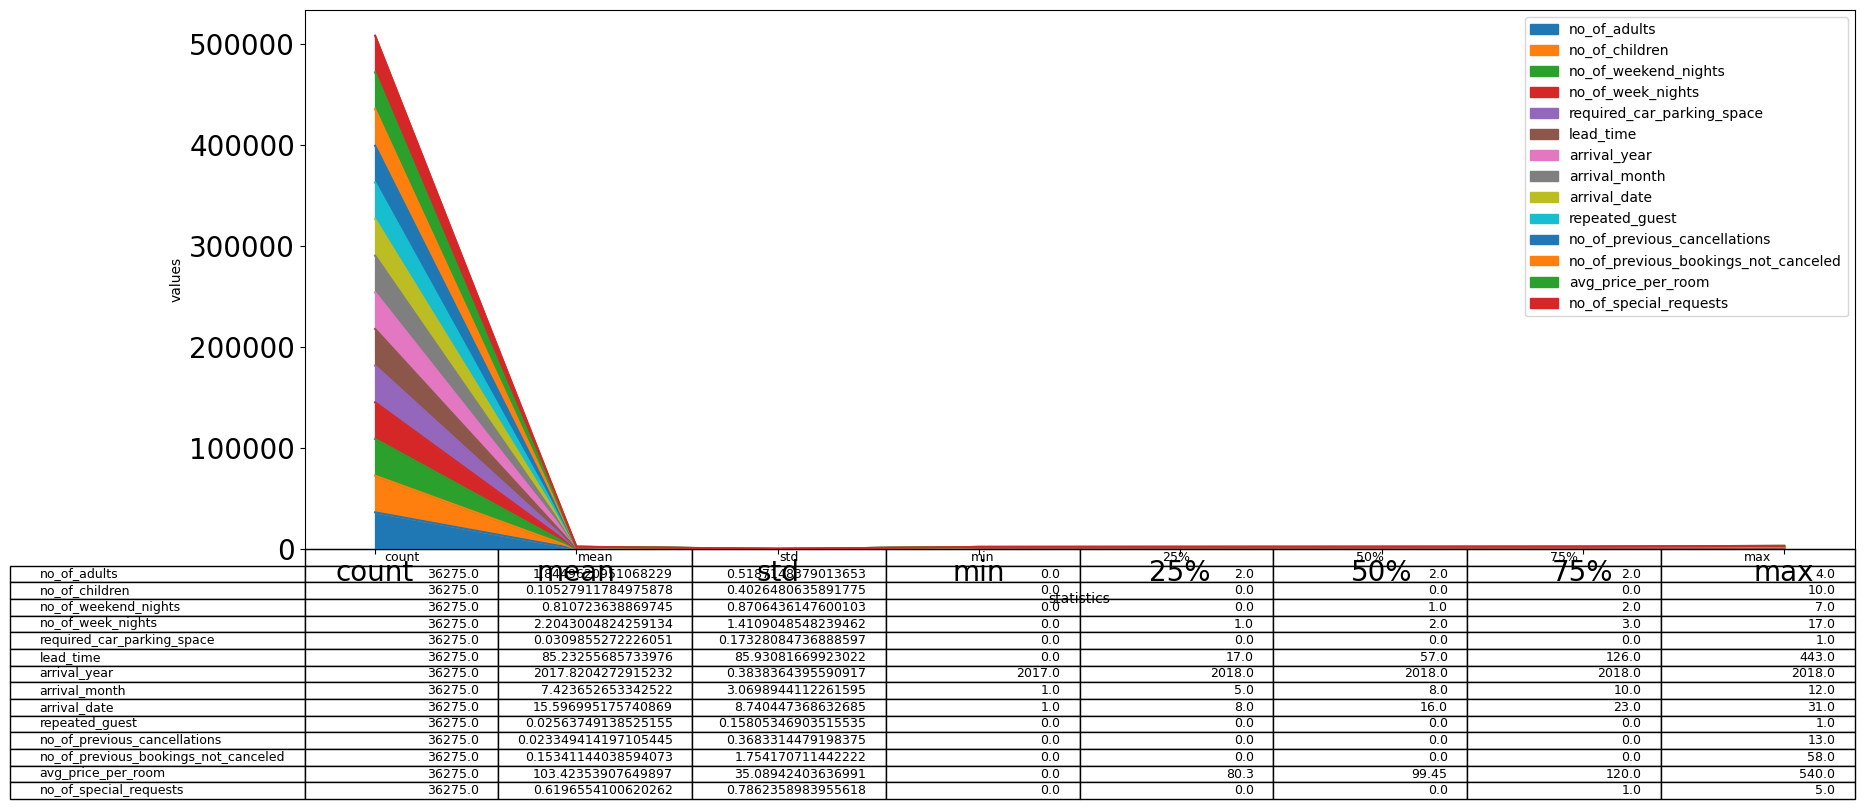

In [10]:
# Visualize the statistics of the dataset

df.describe().plot(kind='area', fontsize=20,figsize=(20,7), table=True)
plt.xlabel('statistics')
plt.ylabel('values')
plt.show()

In [11]:
# check the data types of the columns
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [154]:
# check for missing values

df.isnull()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0           False         False           False                 False   
1           False         False           False                 False   
2           False         False           False                 False   
3           False         False           False                 False   
4           False         False           False                 False   
...           ...           ...             ...                   ...   
36270       False         False           False                 False   
36271       False         False           False                 False   
36272       False         False           False                 False   
36273       False         False           False                 False   
36274       False         False           False                 False   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  False              False                       False   
1                  False              False                       False   
2                  False              False                       False   
3                  False              False                       False   
4                  False              False                       False   
...                  ...                ...                         ...   
36270              False              False                       False   
36271              False              False                       False   
36272              False              False                       False   
36273              False              False                       False   
36274              False              False                       False   

       room_type_reserved  lead_time  arrival_year  arrival_month  \
0                   False      False         False          False   
1                   False      False         False          False   
2                   False      False         False          False   
3                   False      False         False          False   
4                   False      False         False          False   
...                   ...        ...           ...            ...   
36270               False      False         False          False   
36271               False      False         False          False   
36272               False      False         False          False   
36273               False      False         False          False   
36274               False      False         False          False   

       arrival_date  market_segment_type  repeated_guest  \
0             False                False           False   
1             False                False           False   
2             False                False           False   
3             False                False           False   
4             False                False           False   
...             ...                  ...             ...   
36270         False                False           False   
36271         False                False           False   
36272         False                False           False   
36273         False                False           False   
36274         False                False           False   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             False                                 False   
1                             False                                 False   
2                             False                                 False   
3                             False                                 False   
4                             False                                 False   
...                             ...                                   ...   
36270                         False                                 False   
36271                         False                            

In [155]:
# check total number of missing values

missing_values_sum = df.isnull().sum()
missing_values_sum

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [156]:
# Drop all the null values in specific columns

columns_to_check = ['no_of_children', 'no_of_adults', 'arrival_year', 'arrival_month', 'arrival_date']
df.dropna(subset=columns_to_check, inplace=True)
df


Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

In [157]:
# Check for NaN values in the entire DataFrame
nan_values = df.isna()
print(nan_values)

       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0           False         False           False                 False   
1           False         False           False                 False   
2           False         False           False                 False   
3           False         False           False                 False   
4           False         False           False                 False   
...           ...           ...             ...                   ...   
36270       False         False           False                 False   
36271       False         False           False                 False   
36272       False         False           False                 False   
36273       False         False           False                 False   
36274       False         False           False                 False   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  False              False     

__Exploratory Data Analaysis__

In [158]:
# check the relationship between the columns using correlation
df.corr(numeric_only = True)

no_of_adults  no_of_children  \
no_of_adults                              1.000000       -0.019787   
no_of_children                           -0.019787        1.000000   
no_of_weekend_nights                      0.103316        0.029478   
no_of_week_nights                         0.105622        0.024398   
required_car_parking_space                0.011429        0.034244   
lead_time                                 0.097287       -0.047091   
arrival_year                              0.076719        0.045983   
arrival_month                             0.021841       -0.003076   
arrival_date                              0.026338        0.025482   
repeated_guest                           -0.192277       -0.036348   
no_of_previous_cancellations             -0.047426       -0.016390   
no_of_previous_bookings_not_canceled     -0.119166       -0.021189   
avg_price_per_room                        0.296886        0.337728   
no_of_special_requests                    0.189401        0.124486   

                                      no_of_weekend_nights  no_of_week_nights  \
no_of_adults                                      0.103316           0.105622   
no_of_children                                    0.029478           0.024398   
no_of_weekend_nights                              1.000000           0.179577   
no_of_week_nights                                 0.179577           1.000000   
required_car_parking_space                       -0.031111          -0.048784   
lead_time                                         0.046595           0.149650   
arrival_year                                      0.055357           0.032672   
arrival_month                                    -0.009894           0.037376   
arrival_date                                      0.027304          -0.009305   
repeated_guest                                   -0.067107          -0.099764   
no_of_previous_cancellations                     -0.020690          -0.030080   
no_of_previous_bookings_not_canceled             -0.026312          -0.049344   
avg_price_per_room                               -0.004525           0.022753   
no_of_special_requests                            0.060593           0.045994   

                                      required_car_parking_space  lead_time  \
no_of_adults                                            0.011429   0.097287   
no_of_children                                          0.034244  -0.047091   
no_of_weekend_nights                                   -0.031111   0.046595   
no_of_week_nights                                      -0.048784   0.149650   
required_car_parking_space                              1.000000  -0.066445   
lead_time                                              -0.066445   1.000000   
arrival_year                                            0.015684   0.143439   
arrival_month                                          -0.015505   0.136814   
arrival_date                                           -0.000037   0.006479   
repeated_guest                                          0.110909  -0.135984   
no_of_previous_cancellations                            0.027106  -0.045723   
no_of_previous_bookings_not_canceled                    0.063810  -0.078137   
avg_price_per_room                                      0.061304  -0.062596   
no_of_special_requests                                  0.087922  -0.101645   

                                      arrival_year  arrival_month  \
no_of_adults                              0.076719       0.021841   
no_of_children                            0.045983      -0.003076   
no_of_weekend_nights                      0.055357      -0.009894   
no_of_week_nights                         0.032672       0.037376   
required_car_parking_space                0.015684      -0.015505   
lead_time                                 0.143439       0.136814   
arrival_year                              1.000000      -0.339689   
arrival_month                    

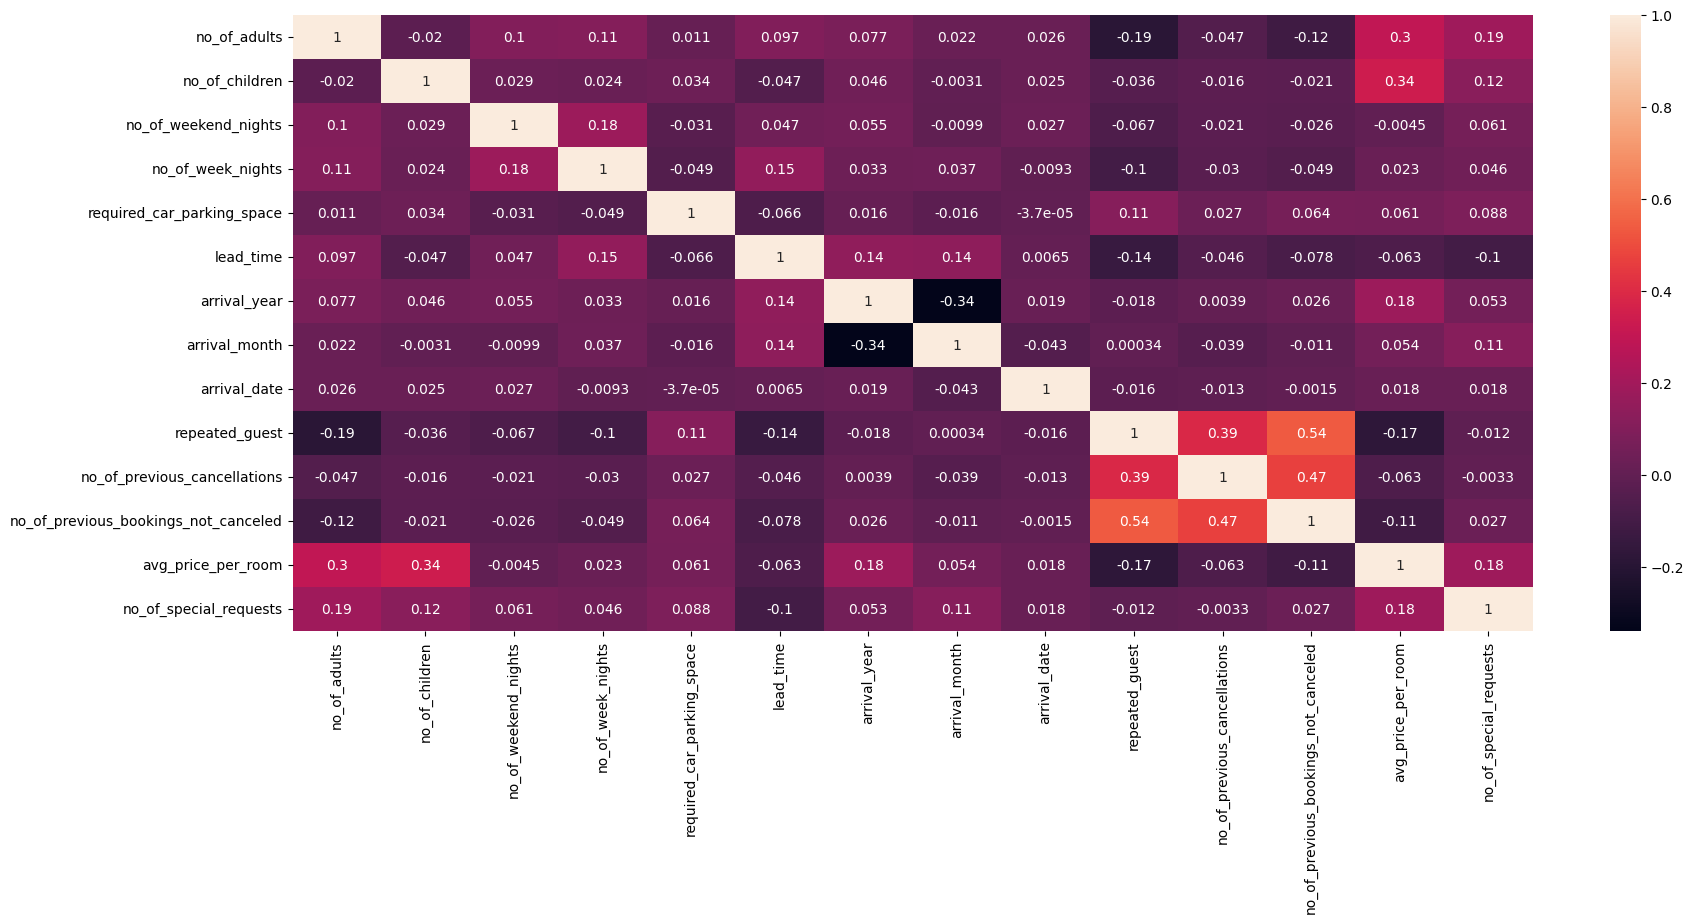

In [159]:
# use a heatmap to visualize the above correlation

numeric_columns = df.select_dtypes(include=['float'])
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.rcParams['figure.figsize'] = (20, 8)
plt.show()

In [160]:
# check for the co-variance matrix

df.cov(numeric_only = True)

no_of_adults  no_of_children  \
no_of_adults                              0.269065       -0.004133   
no_of_children                           -0.004133        0.162125   
no_of_weekend_nights                      0.046659        0.010334   
no_of_week_nights                         0.077300        0.013861   
required_car_parking_space                0.001027        0.002389   
lead_time                                 4.336409       -1.629353   
arrival_year                              0.015275        0.007107   
arrival_month                             0.034780       -0.003802   
arrival_date                              0.119411        0.089681   
repeated_guest                           -0.015764       -0.002313   
no_of_previous_cancellations             -0.009061       -0.002431   
no_of_previous_bookings_not_canceled     -0.108431       -0.014966   
avg_price_per_room                        5.403737        4.771653   
no_of_special_requests                    0.077244        0.039409   

                                      no_of_weekend_nights  no_of_week_nights  \
no_of_adults                                      0.046659           0.077300   
no_of_children                                    0.010334           0.013861   
no_of_weekend_nights                              0.758020           0.220591   
no_of_week_nights                                 0.220591           1.990653   
required_car_parking_space                       -0.004694          -0.011927   
lead_time                                         3.486043          18.143616   
arrival_year                                      0.018500           0.017693   
arrival_month                                    -0.026443           0.161888   
arrival_date                                      0.207779          -0.114747   
repeated_guest                                   -0.009235          -0.022247   
no_of_previous_cancellations                     -0.006635          -0.015632   
no_of_previous_bookings_not_canceled             -0.040185          -0.122124   
avg_price_per_room                               -0.138228           1.126436   
no_of_special_requests                            0.041477           0.051021   

                                      required_car_parking_space    lead_time  \
no_of_adults                                            0.001027     4.336409   
no_of_children                                          0.002389    -1.629353   
no_of_weekend_nights                                   -0.004694     3.486043   
no_of_week_nights                                      -0.011927    18.143616   
required_car_parking_space                              0.030026    -0.989370   
lead_time                                              -0.989370  7384.105259   
arrival_year                                            0.001043     4.731099   
arrival_month                                          -0.008248    36.091390   
arrival_date                                           -0.000056     4.866040   
repeated_guest                                          0.003038    -1.846895   
no_of_previous_cancellations                            0.001730    -1.447179   
no_of_previous_bookings_not_canceled                    0.019396   -11.778110   
avg_price_per_room                                      0.372750  -188.744798   
no_of_special_requests                                  0.011978    -6.867327   

                                      arrival_year  arrival_month  \
no_of_adults                              0.015275       0.034780   
no_of_children                            0.007107      -0.003802   
no_of_weekend_nights                      0.018500      -0.026443   
no_of_week_nights                         0.017693       0.161888   
required_car_parking_space                0.001043      -0.008248   
lead_time                                 4.731099      36.091390   
arrival_year                              0.147330      -0.400268   
arr

<AxesSubplot: >

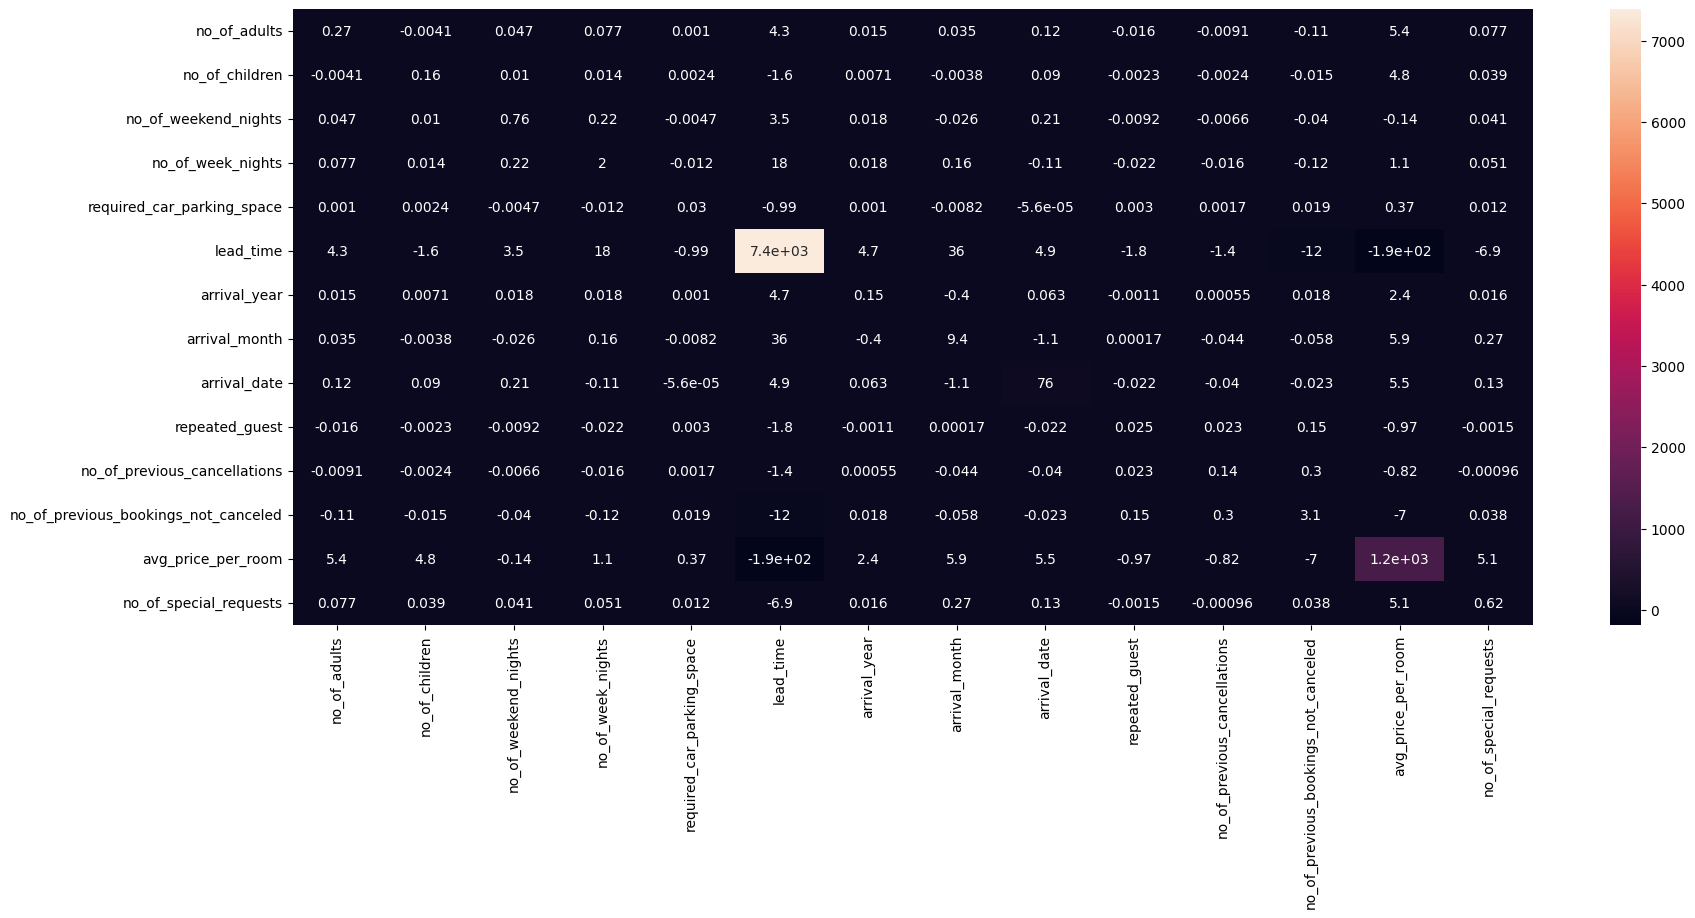

In [161]:
# use a heatmap to visualize the above co-variance matrix

sns.heatmap(df.cov(numeric_only = True), annot=True)

In [162]:
# Rename the 'arrival_date' column to 'arrival_day'
df.rename(columns={'arrival_date': 'arrival_day'}, inplace=True)
df

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  arrival_day  \
0            Room_Type 1        224          2017             10            2   
1            Room_Type 1          5          2018             11            6   
2            Room_Type 1          1          2018              2           28   
3            Room_Type 1        211          2018              5           20   
4            Room_Type 1         48          2018              4           11   
...                  ...        ...           ...            ...          ...   
36270        Room_Type 4         85          2018              8            3   
36271        Room_Type 1        228          2018             10           17   
36272        Room_Type 1        148          2018              7            1   
36273        Room_Type 1         63          2018              4           21   
36274        Room_Type 1        207          2018             12           30   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
1                  Online               0                             0   
2                  Online               0                             0   
3                  Online               0                             0   
4                  Online               0                             0   
...                   ...             ...                           ...   
36270              Online               0                             0   
36271              Online               0                             0   
36272              Online               0                             0   
36273              Online               0                             0   
36274             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0

In [163]:
# Create a new column for date

df['date'] = pd.to_datetime(df['arrival_year'].astype(str) + '-' + df['arrival_month'].astype(str) + '-' + df['arrival_day'].astype(str), errors='coerce')
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df['date']


0        2017-10-02
1        2018-11-06
2        2018-02-28
3        2018-05-20
4        2018-04-11
            ...    
36270    2018-08-03
36271    2018-10-17
36272    2018-07-01
36273    2018-04-21
36274    2018-12-30
Name: date, Length: 36275, dtype: object

In [164]:
# create a day of the week column from the date column

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['day_of_week'] = df['date'].dt.day_name()
df



Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  arrival_day  \
0            Room_Type 1        224          2017             10            2   
1            Room_Type 1          5          2018             11            6   
2            Room_Type 1          1          2018              2           28   
3            Room_Type 1        211          2018              5           20   
4            Room_Type 1         48          2018              4           11   
...                  ...        ...           ...            ...          ...   
36270        Room_Type 4         85          2018              8            3   
36271        Room_Type 1        228          2018             10           17   
36272        Room_Type 1        148          2018              7            1   
36273        Room_Type 1         63          2018              4           21   
36274        Room_Type 1        207          2018             12           30   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
1                  Online               0                             0   
2                  Online               0                             0   
3                  Online               0                             0   
4                  Online               0                             0   
...                   ...             ...                           ...   
36270              Online               0                             0   
36271              Online               0                             0   
36272              Online               0                             0   
36273              Online               0                             0   
36274             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0

In [165]:
# check the statistics of the dataset again, after adding new columns

df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

        arrival_day  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

In [166]:
# Check for the least price on a room
# Check for the most expensive rooms
# Check the most Booked Room
# Check for the highest Number of Times an Individual Has Canceled a Booking

from tabulate import tabulate

# Least Price on a Room
least_price_room = df.loc[df['avg_price_per_room'].idxmin()]
least_price_table = least_price_room[['room_type_reserved', 'avg_price_per_room']]
print("\nLeast Price on a Room:\n")
print(tabulate(least_price_table.to_frame().transpose(), headers='keys', tablefmt='fancy_grid'))

# Most Expensive Rooms
most_expensive_rooms = df.loc[df['avg_price_per_room'].idxmax()]
most_expensive_table = most_expensive_rooms[['room_type_reserved', 'avg_price_per_room']]
print("\nMost Expensive Rooms:\n")
print(tabulate(most_expensive_table.to_frame().transpose(), headers='keys', tablefmt='fancy_grid'))

# Most Booked Room
most_booked_room = df['room_type_reserved'].value_counts().idxmax()
if pd.notna(most_booked_room) and most_booked_room != 0:
    most_booked_table = {"Room Type": [most_booked_room]}
    print("\nMost Booked Room:\n")
    print(tabulate(most_booked_table, headers='keys', tablefmt='fancy_grid'))
else:
    print("\nMost Booked Room: No valid information found.")

# Highest Number of Times an Individual Has Canceled a Booking
individual_cancellations = df.loc[df['booking_status'] == 'Canceled'].groupby('Booking_ID').size().idxmax()
if pd.notna(individual_cancellations) and individual_cancellations != 0:
    cancellations_table = {"Booking_ID": [individual_cancellations]}
    print("\nCustomer with the Highest Number of Cancellations:\n")
    print(tabulate(cancellations_table, headers='keys', tablefmt='fancy_grid'))
else:
    print("\nCustomer with the Highest Number of Cancellations: No valid information found.")



Least Price on a Room:

╒════╤══════════════════════╤══════════════════════╕
│    │ room_type_reserved   │   avg_price_per_room │
╞════╪══════════════════════╪══════════════════════╡
│ 63 │ Room_Type 1          │                    0 │
╘════╧══════════════════════╧══════════════════════╛

Most Expensive Rooms:

╒═══════╤══════════════════════╤══════════════════════╕
│       │ room_type_reserved   │   avg_price_per_room │
╞═══════╪══════════════════════╪══════════════════════╡
│ 33114 │ Room_Type 1          │                  540 │
╘═══════╧══════════════════════╧══════════════════════╛

Most Booked Room:

╒═════════════╕
│ Room Type   │
╞═════════════╡
│ Room_Type 1 │
╘═════════════╛

Customer with the Highest Number of Cancellations:

╒══════════════╕
│ Booking_ID   │
╞══════════════╡
│ INN00003     │
╘══════════════╛


The tables above show the following:
- The least price on a room is 0 for Room_Type 1    
- The price on the most expensive room 540
- The most booked room is Room_Type_1
- The highest number of cancellations comes from a client with Booking ID - INN00003

__Data Visualization__

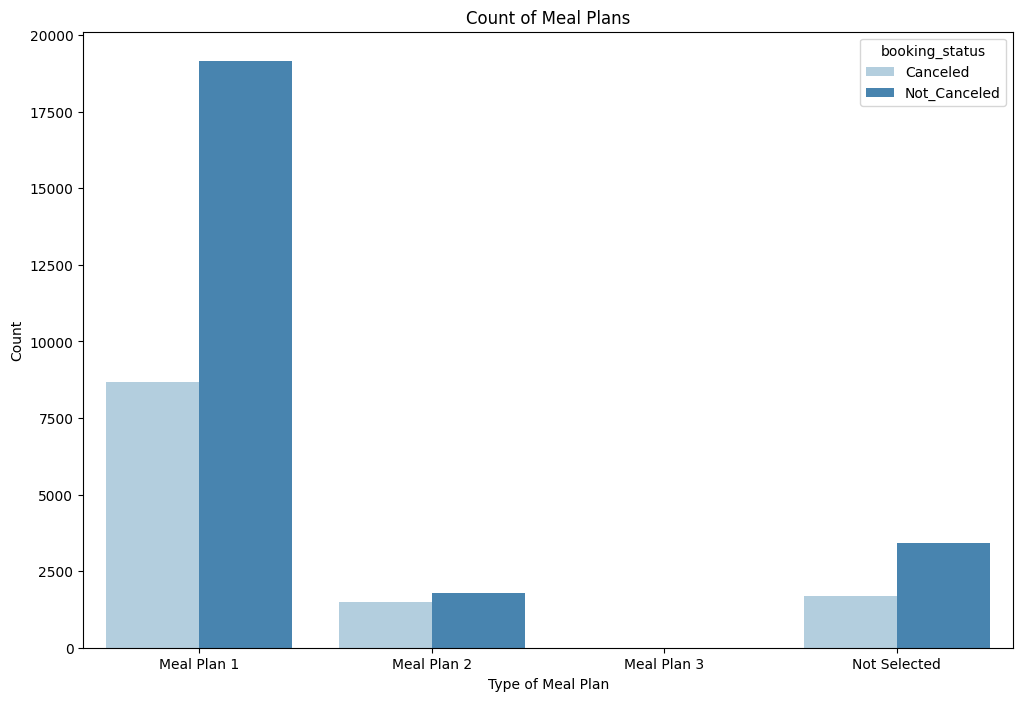

In [167]:
# Count the occurrences of each meal plan and the booking status 
meal_plan_counts = df.groupby(['type_of_meal_plan', 'booking_status']).size().reset_index(name='count')
plt.figure(figsize=(12, 8))
sns.barplot(x='type_of_meal_plan', y='count', hue='booking_status', data=meal_plan_counts, palette='Blues')
plt.title('Count of Meal Plans')
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.show()

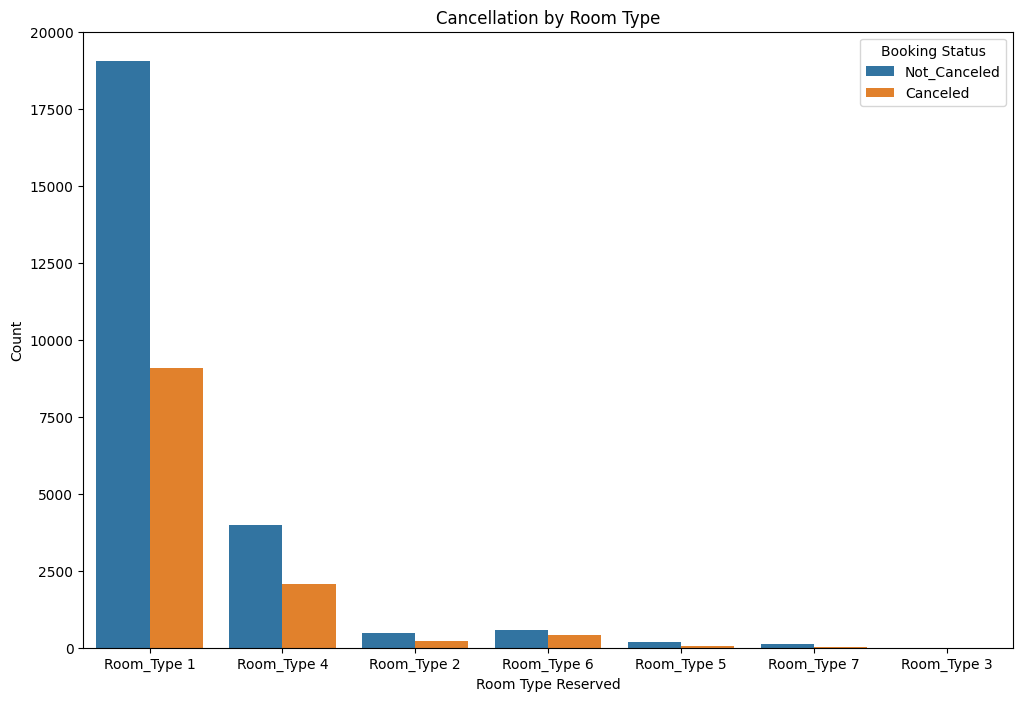

In [182]:
# Cancelation by Room Type

plt.figure(figsize=(12, 8))
sns.countplot(x='room_type_reserved', hue='booking_status', data=df)
plt.title('Cancellation by Room Type')
plt.xlabel('Room Type Reserved')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()


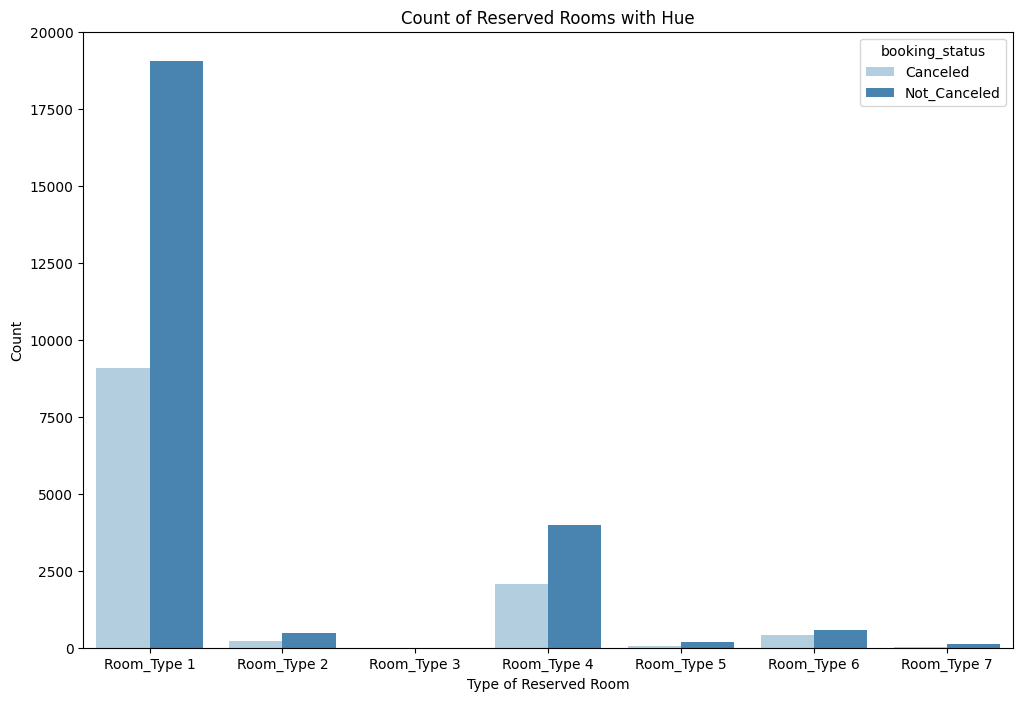

In [179]:
# count of various reserved room types

reserved_room_counts = df.groupby(['room_type_reserved', 'booking_status']).size().reset_index(name='count')
plt.figure(figsize=(12, 8))
sns.barplot(x='room_type_reserved', y='count', hue='booking_status', data=reserved_room_counts, palette='Blues')
plt.title('Count of Reserved Rooms with Hue')
plt.xlabel('Type of Reserved Room')
plt.ylabel('Count')
plt.show()

__The count of reserved rooms graph above shows that Room_Type_1 had a lot more reservations followed by Room_Type_2. The hotel's management should work on improving the aesthetics and general feel of the other rooms as it seems Room_Type_1 and Room_Type_4 are the people's favorites.__

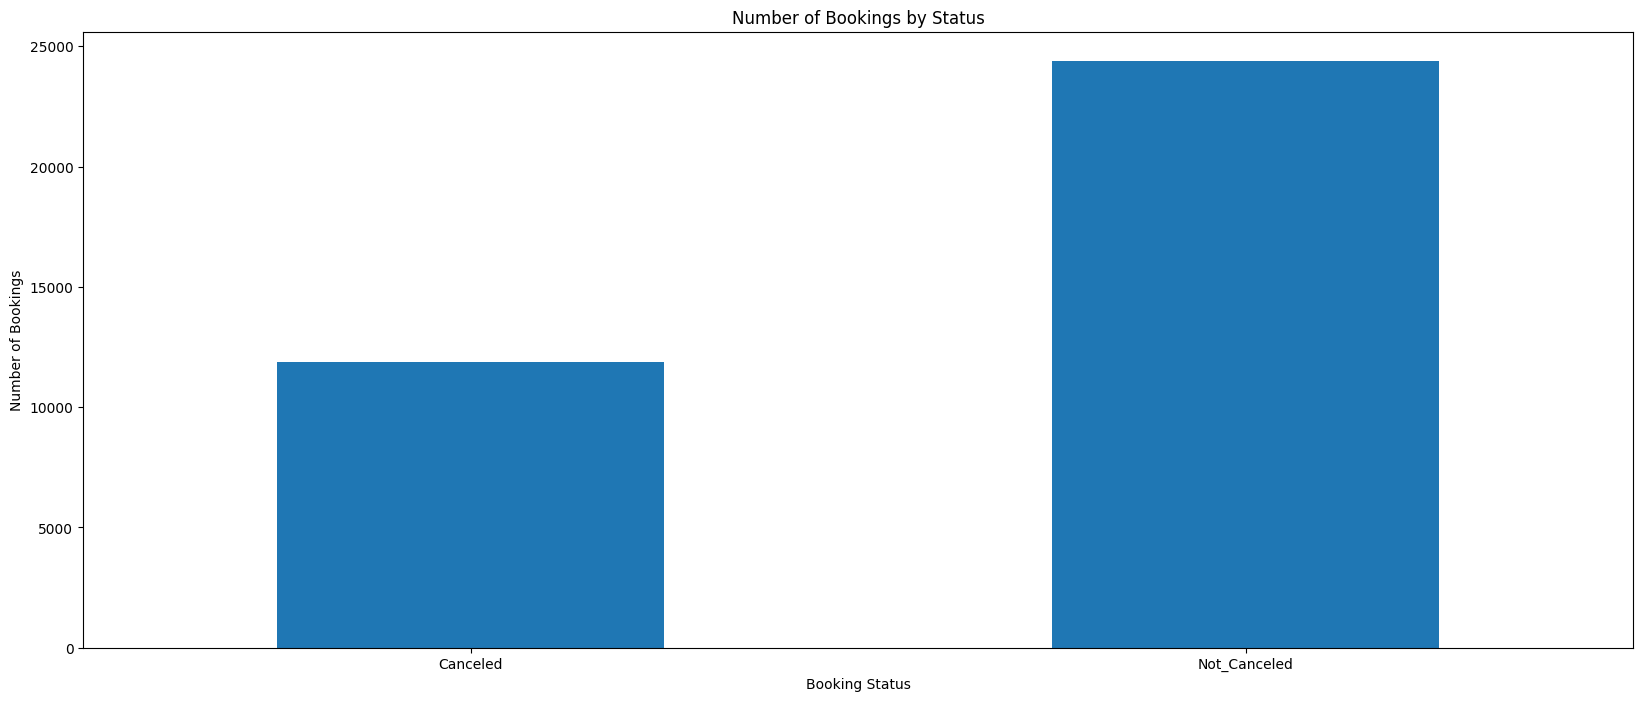

Number of bookings that were Canceled: 11885
Number of bookings that were Not Canceled: 24390


In [169]:
# Group by booking status and count the number of bookings

booking_status_counts = df.groupby('booking_status').size()
booking_status_counts.plot(kind='bar', rot=0)
plt.xlabel('Booking Status')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Status')
plt.show()
print("Number of bookings that were Canceled:", booking_status_counts['Canceled'])
print("Number of bookings that were Not Canceled:", booking_status_counts['Not_Canceled'])

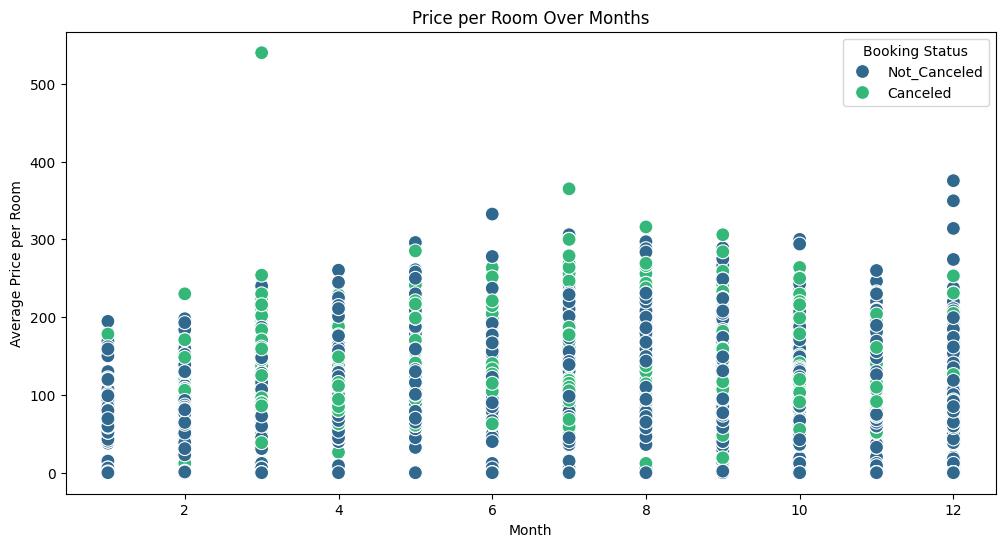

In [170]:
# Price Per Room Over Months
df['avg_price_per_room'] = pd.to_numeric(df['avg_price_per_room'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='arrival_month', y='avg_price_per_room', data=df, hue='booking_status', palette='viridis', s=100)
plt.title('Price per Room Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price per Room')
plt.legend(title='Booking Status')
plt.show()


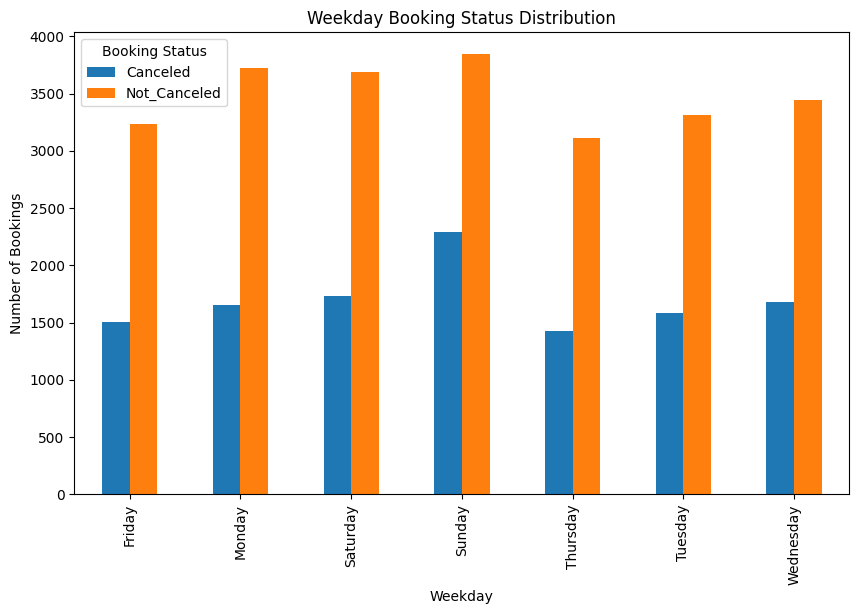

In [171]:
# show weekday by booking status

weekday_booking_counts = pd.crosstab(df['day_of_week'], df['booking_status'])
weekday_booking_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Weekday Booking Status Distribution')
plt.xlabel('Weekday')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status')
plt.show()

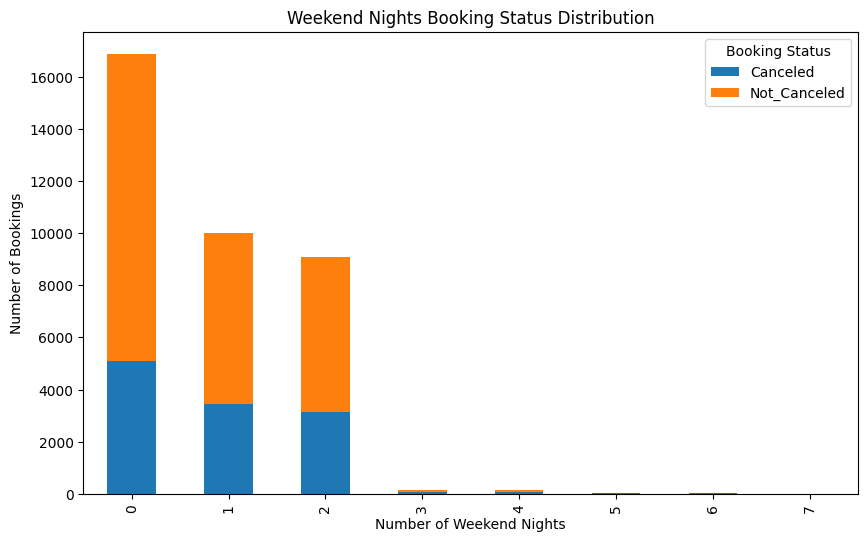

In [172]:
 # show weekend nights by booking status
weekend_nights_booking_counts = df.groupby(['no_of_weekend_nights', 'booking_status']).size().unstack(fill_value=0)
weekend_nights_booking_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Weekend Nights Booking Status Distribution')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status')
plt.show()

__The booking status distribution graphs above show that there are more cancellations on Sundays than on any other days__

<Figure size 1500x800 with 0 Axes>

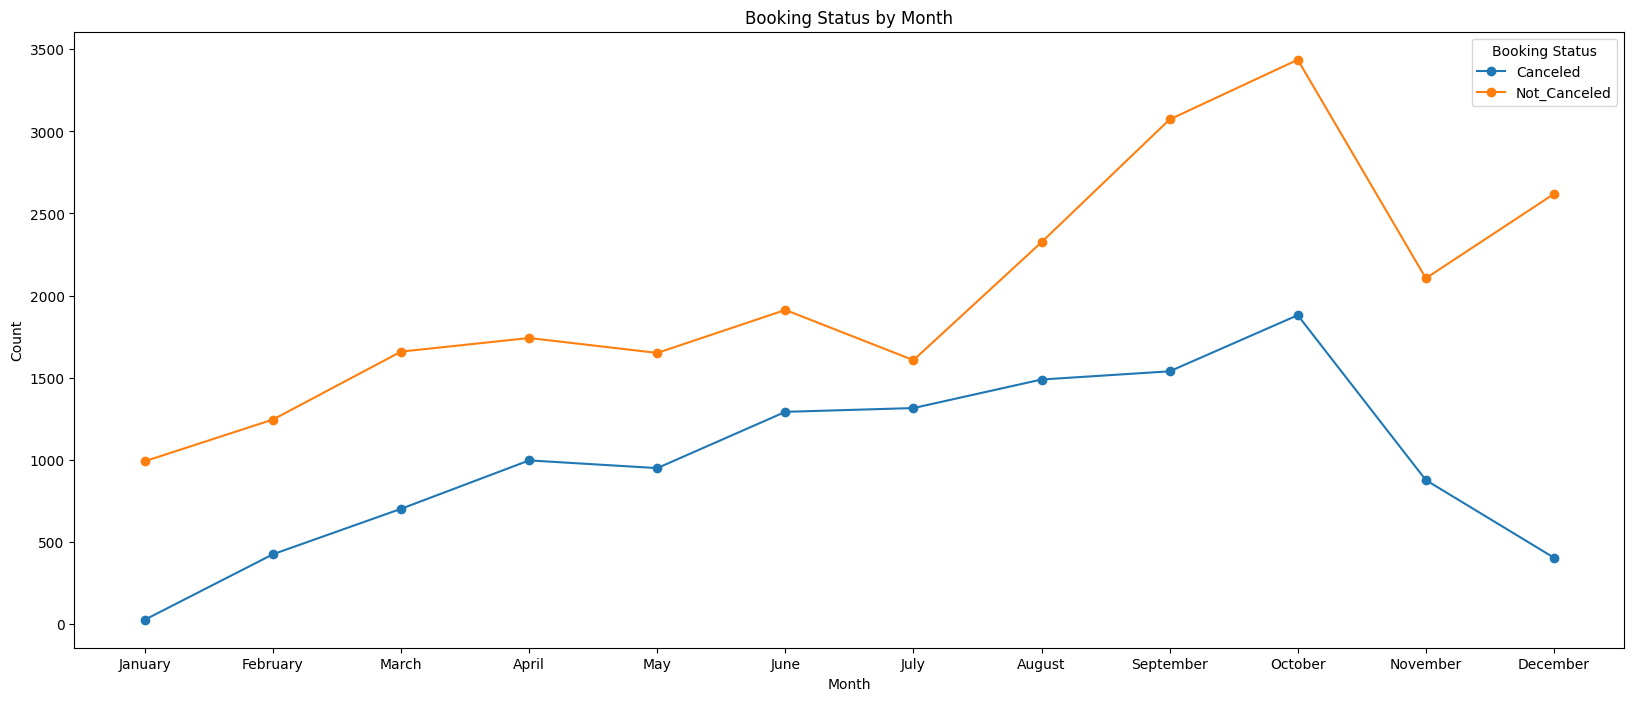

In [173]:
# Booking status by month of the year
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
booking_status_counts = df.groupby(['month', 'booking_status']).size().unstack(fill_value=0)
plt.figure(figsize=(15, 8))
booking_status_counts.plot(kind='line', marker='o')
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(booking_status_counts.index, month_names)
plt.title('Booking Status by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()


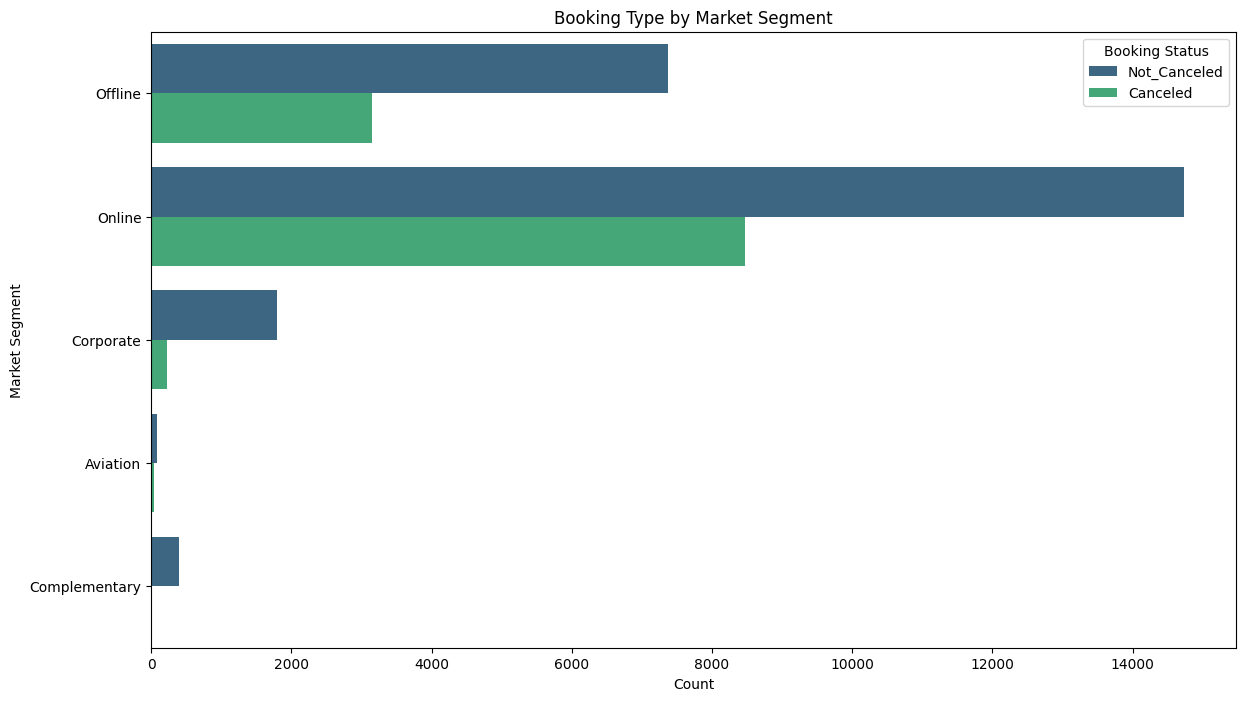

In [174]:
# Booking Type by Market Segment

df['booking_status'] = df['booking_status'].replace('Not Canceled', 'Not_Canceled')
plt.figure(figsize=(14, 8))
sns.countplot(y='market_segment_type', hue='booking_status', data=df, palette='viridis')
plt.title('Booking Type by Market Segment')
plt.ylabel('Market Segment')
plt.xlabel('Count')
plt.legend(title='Booking Status')
plt.show()



__From the booking type by market segment graph above, we see that a large portion of the bookings received during the period were done online, this means that the marketing team need to focus on targeting and optimizing online channels for advertising and promotions. They should leverage digital marketing strategies, including social media campaigns, online travel agencies, and the hotel's official website, to attract more online bookings. They can also partner with online travel agencies and work on discounts for all online bookings.__

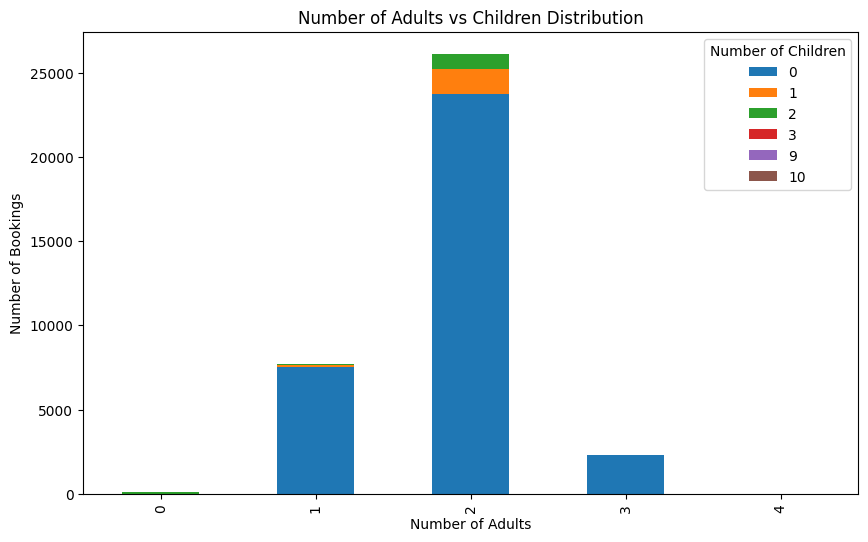

Count of Adults: 66926
Count of Children: 3819
Percentage of Adults: 94.60%
Percentage of Children: 5.40%


In [185]:
# show number of adults compared to children

adults_children_counts = df.groupby(['no_of_adults', 'no_of_children']).size().unstack(fill_value=0)
ax = adults_children_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Adults vs Children Distribution')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Bookings')
plt.legend(title='Number of Children')
plt.show()

total_adults = df['no_of_adults'].sum()
total_children = df['no_of_children'].sum()

print(f"Count of Adults: {total_adults}")
print(f"Count of Children: {total_children}")

# Calculate and print the percentage
percentage_adults = (total_adults / (total_adults + total_children)) * 100
percentage_children = (total_children / (total_adults + total_children)) * 100

print(f"Percentage of Adults: {percentage_adults:.2f}%")
print(f"Percentage of Children: {percentage_children:.2f}%")


The number of children by bookings are significantly less than adults

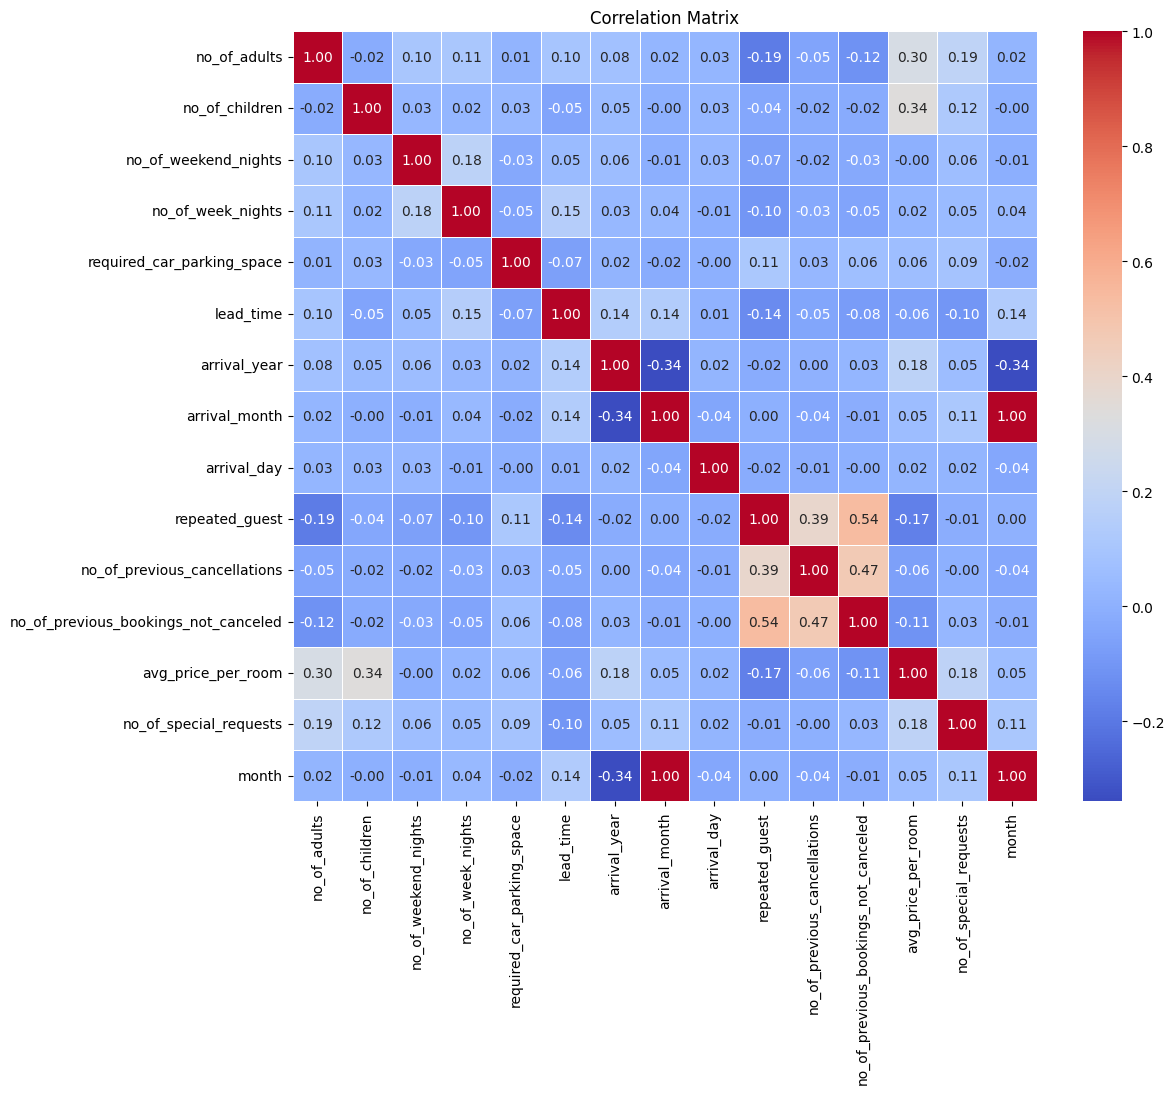

In [176]:
# show a correlation amongst variables

correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


__The correlation heatmap above, shows a noticeable positive correlation between the variable "months" and the "number of adults" has been identified. This suggests that there may be a discernible trend or pattern in the dataset, indicating a potential influence of the month on the count of adult guests.

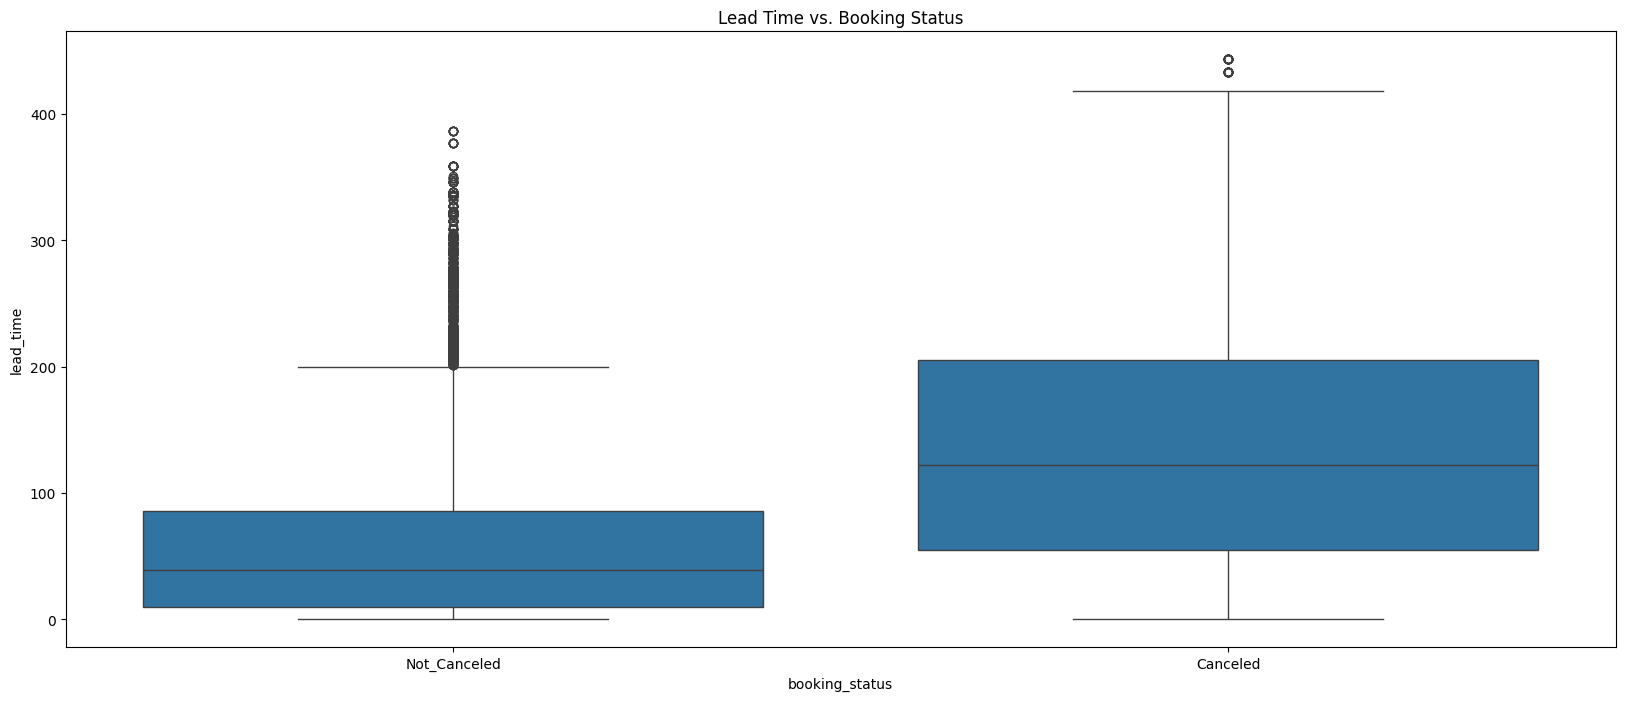

In [178]:
# Box plot for lead time vs booking status
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.title('Lead Time vs. Booking Status')
plt.show()